In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import os
import cv2
import SimpleITK as sitk
import numpy as np
import glob

In [22]:
path = "C:/Users/keshavgubbi/Desktop/ATLAS/S5-Binarizing/data/sample/"
nrrd_path = "C:/Users/keshavgubbi/Desktop/filestructure/mocktransf/PmCH1/individual_transformed"
outpath = "C:/Users/keshavgubbi/Desktop/ATLAS/S5-Binarizing/f/"

In [23]:
def threshold_otsu_using_OpenCV(img):
    img = cv2.imread(os.path.join(path, filename),0)
    imgarray = np.asarray(img)
    # Otsu's thresholding
    ret2,th2 = cv2.threshold(imgarray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) #th2 is the thresholded image
    plt.imshow(th2,cmap = "gray")
    plt.show()
    return th2   

In [48]:
def image_details(image):
    print("**********************")
    print("Size:",image.GetSize())
    print("PixelIDType:",image.GetPixelIDTypeAsString())
    print("Voxel Size:",image.GetSpacing())

#def display_and_save(image):
    


In [58]:
def threshold_using_OtsuFilter(img):
    
    image = sitk.ReadImage(os.path.join(path, filename))
    image_details(image)

    # global otsu filter
    otsu_filter = sitk.OtsuThresholdImageFilter()
    otsu_filter.SetInsideValue(0)
    otsu_filter.SetOutsideValue(1)
    otsu_segmented_image = otsu_filter.Execute(image)
    otsu_segmented_image = np.reshape(otsu_segmented_image, (974, 597))

    plt.imshow(otsu_segmented_image, cmap='gray')
    plt.savefig(os.path.join(outpath,'otsu_{}'.format(img)))
    #plt.savefig("C:/Users/keshavgubbi/Desktop/ATLAS/S5-Binarizing/f/otsu_{}".format(img))
    plt.axis("Off")
    plt.show()

    return otsu_segmented_image

In [59]:
def threshold_usingRenyiFilter(img):
    image = sitk.ReadImage(os.path.join(path, filename))
    pass

C:/Users/keshavgubbi/Desktop/ATLAS/S5-Binarizing/data/sample/T_AVG_PmCH1_GFP0007.tif
**********************
Size: (597, 974)
PixelIDType: 8-bit unsigned integer
Voxel Size: (1.0, 1.0)


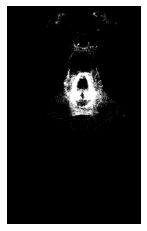

C:/Users/keshavgubbi/Desktop/ATLAS/S5-Binarizing/data/sample/T_AVG_PmCH1_GFP0008.tif
**********************
Size: (597, 974)
PixelIDType: 8-bit unsigned integer
Voxel Size: (1.0, 1.0)


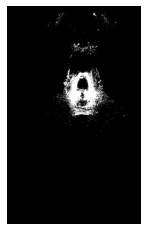

C:/Users/keshavgubbi/Desktop/ATLAS/S5-Binarizing/data/sample/T_AVG_PmCH1_GFP0016.tif
**********************
Size: (597, 974)
PixelIDType: 8-bit unsigned integer
Voxel Size: (1.0, 1.0)


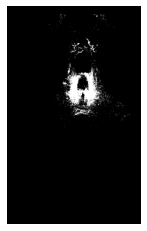

C:/Users/keshavgubbi/Desktop/ATLAS/S5-Binarizing/data/sample/T_AVG_PmCH1_GFP0017.tif
**********************
Size: (597, 974)
PixelIDType: 8-bit unsigned integer
Voxel Size: (1.0, 1.0)


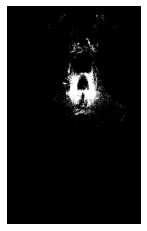

C:/Users/keshavgubbi/Desktop/ATLAS/S5-Binarizing/data/sample/T_AVG_PmCH1_GFP0126.tif
**********************
Size: (597, 974)
PixelIDType: 8-bit unsigned integer
Voxel Size: (1.0, 1.0)


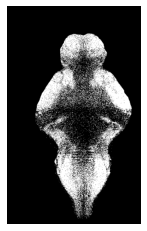

C:/Users/keshavgubbi/Desktop/ATLAS/S5-Binarizing/data/sample/T_AVG_PmCH1_GFP0127.tif
**********************
Size: (597, 974)
PixelIDType: 8-bit unsigned integer
Voxel Size: (1.0, 1.0)


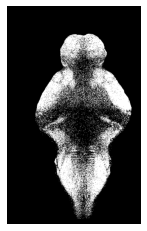

C:/Users/keshavgubbi/Desktop/ATLAS/S5-Binarizing/data/sample/T_AVG_PmCH1_GFP0128.tif
**********************
Size: (597, 974)
PixelIDType: 8-bit unsigned integer
Voxel Size: (1.0, 1.0)


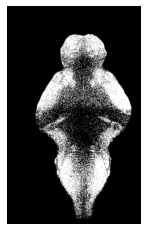

C:/Users/keshavgubbi/Desktop/ATLAS/S5-Binarizing/data/sample/T_AVG_PmCH1_GFP0129.tif
**********************
Size: (597, 974)
PixelIDType: 8-bit unsigned integer
Voxel Size: (1.0, 1.0)


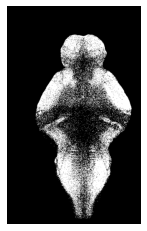

C:/Users/keshavgubbi/Desktop/ATLAS/S5-Binarizing/data/sample/T_AVG_PmCH1_GFP0130.tif
**********************
Size: (597, 974)
PixelIDType: 8-bit unsigned integer
Voxel Size: (1.0, 1.0)


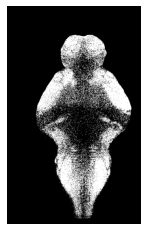

In [57]:
for filename in os.listdir(path):
    if filename.endswith(".nrrd") or filename.endswith(".tif"): 
        print(os.path.join(path,filename))
        #thresh_image = threshold_otsu_using_OpenCV(filename)
        thresh_image = threshold_using_OtsuFilter(filename)
        
        

In [27]:
image = sitk.ReadImage(os.path.join(path, filename))
print("image size:",image.GetSize())
#print(image.GetDimension())
#print(image.GetPixelIDTypeAsString())
nda = sitk.GetArrayFromImage(image)
nda = np.reshape(image, (597, 974))
print("resized:",nda.shape)

image size: (597, 974)
resized: (597, 974)


In [ ]:

    """
    print("image size:",image.GetSize())
    nda = sitk.GetArrayFromImage(image)
    nda = np.reshape(image, (597, 974))
    print("resized:",nda.shape)
    #seg = otsu_filter.Execute(nda) #seg is the thresholded image
    img = sitk.GetImageFromArray(nda)
    seg = otsu_filter.Execute(img)
    seg = sitk.GetImageFromArray(seg)
    print("image size:",seg.GetSize())
    plt.imshow(seg)
    plt.show()
    """
    

In [ ]:
def display_thresholded_image(img,threshold_filter):
    plt.title("{}".format(threshold_filter))
    plt.axis('off')
    plt.show()
    return img

In [ ]:
for filename in os.listdir(nrrd_path):
    if filename.endswith(".nrrd") or filename.endswith(".tif"): 
        print(os.path.join(nrrd_path,filename))
        img1 = sitk.ReadImage(os.path.join(nrrd_path, filename))
        img1_255 = sitk.Cast(sitk.RescaleIntensity(img1), sitk.sitkUInt8)
    else:
        print("Check format of the file - doesnt belong to .nrrd or .tif formats.")